In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

In [23]:
import re
import pandas as pd

# Abrir arquivo de texto
with open('wpp_messages.txt', 'r', encoding='utf-8') as f:
    data = f.read()

# Extrair mensagens do arquivo
mensagens = re.findall(r'(\d+/\d+/\d+\s\d+:\d+)\s-\s(.+?):\s(.+?(?=\d+/\d+/\d+\s\d+:\d+|$))', data, re.DOTALL)

# Criar dataframe com as mensagens
df = pd.DataFrame(mensagens, columns=['data', 'autor', 'conteudo'])

# Limpar texto das mensagens
df['conteudo'] = df['conteudo'].str.replace('\n', ' ').str.strip()

# Exibir dataframe
print(df.head())


               data                                              autor  \
0  28/01/2023 03:27  As mensagens e as chamadas são protegidas com ...   
1  28/01/2023 03:30                                              Lanna   
2  28/01/2023 03:34                                 henrique levcovitz   
3  28/01/2023 03:35                                             Burrel   
4  28/01/2023 03:54                                 henrique levcovitz   

                                            conteudo  
0    Vale contar retroativo? Tenho anotado em um app  
1                                                Sim  
2                 Manda a lista mais atual por favor  
3  SEMANA 4 *SCORE GERAL* Cabra = 19 Marcelo = 19...  
4  SEMANA 4 *SCORE GERAL* Cabra = 19 Marcelo = 19...  


In [24]:
df.head(30)

,data,autor,conteudo
0,28/01/2023 03:27,As mensagens e as chamadas são protegidas com ...,Vale contar retroativo? Tenho anotado em um app
1,28/01/2023 03:30,Lanna,Sim
2,28/01/2023 03:34,henrique levcovitz,Manda a lista mais atual por favor
3,28/01/2023 03:35,Burrel,SEMANA 4 *SCORE GERAL* Cabra = 19 Marcelo = 19...
4,28/01/2023 03:54,henrique levcovitz,SEMANA 4 *SCORE GERAL* Cabra = 19 Marcelo = 19...
5,28/01/2023 03:54,henrique levcovitz,Vou buscar
6,28/01/2023 13:52,Betz,<Arquivo de mídia oculto>
7,28/01/2023 13:52,Betz,Quero saber quando vai liberar dia 6
8,28/01/2023 15:42,Vinicin,SEMANA 4 *SCORE GERAL* Cabra = 20 Marcelo = 19...
9,28/01/2023 15:42,henrique levcovitz,SEMANA 4 *SCORE GERAL* Cabra = 20 Marcelo = 19...


In [25]:
score_geral = df[df['conteudo'].str.contains('SCORE GERAL')]
score_geral = df[df['conteudo'].str.contains('Boné')]

In [26]:
score_geral.head(10)

,data,autor,conteudo
4,28/01/2023 03:54,henrique levcovitz,SEMANA 4 *SCORE GERAL* Cabra = 19 Marcelo = 19...
9,28/01/2023 15:42,henrique levcovitz,SEMANA 4 *SCORE GERAL* Cabra = 20 Marcelo = 19...
18,29/01/2023 16:00,Fernando,SEMANA 4 *SCORE GERAL* Cabra = 20 Marcelo = 19...
20,29/01/2023 16:02,Moura,SEMANA 4 *SCORE GERAL* Cabra = 20 Marcelo = 19...
23,29/01/2023 16:14,Betz,SEMANA 4 *SCORE GERAL* Cabra = 20 Marcelo = 19...
24,30/01/2023 16:22,Moura,SEMANA 5 *SCORE GERAL* Cabra = 20 Marcelo = 19...
25,30/01/2023 16:22,Vinicin,SEMANA 5 *SCORE GERAL* Cabra = 21 Marcelo = 19...
27,30/01/2023 16:30,Ceci,SEMANA 5 *SCORE GERAL* Cabra = 21 Marcelo = 20...
29,30/01/2023 17:07,Betz,SEMANA 5 *SCORE GERAL* Cabra = 21 Marcelo = 20...
33,30/01/2023 18:03,Betz,SEMANA 5 *SCORE GERAL* Cabra = 21 Marcelo = 20...


In [27]:
# Definindo as colunas de interesse
colunas = ['data', 'autor', 'conteudo']


# Selecionando as linhas com "*SCORE GERAL*"
score_geral_scores = score_geral[score_geral['conteudo'].str.contains('\*SCORE GERAL\*', regex=True)]


# Criando as colunas dos nomes
nomes = []
for row in score_geral_scores.itertuples(index=False):
    nome_scores = dict(re.findall(r'(\w+)\s=\s(\d+)', row.conteudo))
    nomes.extend(nome_scores.keys())

nomes = list(set(nomes))

for nome in nomes:
    score_geral_scores[nome] = score_geral_scores.conteudo.str.extract(fr'{nome}\s*=\s*(\d+)', expand=False)
    score_geral_scores[nome] = pd.to_numeric(score_geral_scores[nome], errors='coerce')

score_geral_scores.drop('conteudo', axis=1, inplace=True)

# Agrupando as linhas pelo dia e preenchendo os valores nulos com a média
score_geral_scores = score_geral_scores.groupby(['data']).mean()
score_geral_scores.reset_index(inplace=True)


/var/folders/zg/mngsq9fj7l12tthq4pd8ljk80000gn/T/ipykernel_32557/4081703198.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_geral_scores = score_geral_scores.groupby(['data']).mean()


In [28]:
score_geral_scores.head(100)

,data,Fernando,Rods,Lanna,Fábio,Boné,Robert,Cabra,Ava,Burrel,Beds,Marcelo,Moura
0,01/02/2023 00:29,18.0,16.0,7.0,19.0,11.0,4.0,21.0,8.0,18.0,21.0,21.0,20.0
1,01/02/2023 00:37,18.0,16.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,21.0,21.0,20.0
2,01/02/2023 00:38,19.0,16.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,21.0,21.0,20.0
3,01/02/2023 01:48,19.0,17.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,21.0,21.0,20.0
4,01/02/2023 16:30,19.0,17.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,22.0,21.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,07/02/2023 00:07,21.0,19.0,10.0,22.0,13.0,5.0,25.0,9.0,20.0,24.0,25.0,23.0
96,07/02/2023 00:08,21.0,19.0,10.0,22.0,13.0,5.0,25.0,9.0,21.0,24.0,25.0,23.0
97,07/02/2023 01:10,22.0,19.0,10.0,22.0,13.0,5.0,25.0,9.0,21.0,24.0,25.0,23.0
98,07/02/2023 01:18,22.0,19.0,10.0,22.0,13.0,5.0,26.0,9.0,21.0,24.0,25.0,23.0


In [29]:
score_geral_scores.dtypes

data         object
Fernando    float64
Rods        float64
Lanna       float64
Fábio       float64
Boné        float64
Robert      float64
Cabra       float64
Ava         float64
Burrel      float64
Beds        float64
Marcelo     float64
Moura       float64
dtype: object

In [30]:
import pandas as pd

score_geral_scores['data'] = pd.to_datetime(score_geral_scores['data'], format='%d/%m/%Y %H:%M')


In [31]:
score_geral_scores.head(10)

,data,Fernando,Rods,Lanna,Fábio,Boné,Robert,Cabra,Ava,Burrel,Beds,Marcelo,Moura
0,2023-02-01 00:29:00,18.0,16.0,7.0,19.0,11.0,4.0,21.0,8.0,18.0,21.0,21.0,20.0
1,2023-02-01 00:37:00,18.0,16.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,21.0,21.0,20.0
2,2023-02-01 00:38:00,19.0,16.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,21.0,21.0,20.0
3,2023-02-01 01:48:00,19.0,17.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,21.0,21.0,20.0
4,2023-02-01 16:30:00,19.0,17.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,22.0,21.0,20.0
5,2023-02-01 16:37:00,19.0,17.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,22.0,21.0,21.0
6,2023-02-01 17:06:00,19.0,17.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,22.0,22.0,21.0
7,2023-02-01 23:18:00,19.0,18.0,7.0,19.0,11.0,4.0,22.0,8.0,18.0,22.0,22.0,21.0
8,2023-02-01 23:26:00,19.0,18.0,7.0,20.0,11.0,4.0,22.0,8.0,18.0,22.0,22.0,21.0
9,2023-02-01 23:52:00,19.0,18.0,8.0,20.0,11.0,4.0,22.0,8.0,18.0,22.0,22.0,21.0


In [32]:
score_geral_scores_daily = score_geral_scores.groupby(pd.Grouper(key='data', freq='D')).max().reset_index()


In [33]:
score_geral_scores_daily.head(100)

,data,Fernando,Rods,Lanna,Fábio,Boné,Robert,Cabra,Ava,Burrel,Beds,Marcelo,Moura
0,2023-01-28,16.0,15.0,6.0,17.0,11.0,4.0,20.0,8.0,16.0,18.0,19.0,17.0
1,2023-01-29,17.0,15.0,6.0,17.0,11.0,4.0,20.0,8.0,16.0,19.0,19.0,18.0
2,2023-01-30,17.0,15.0,6.0,18.0,11.0,4.0,21.0,8.0,16.0,20.0,20.0,19.0
3,2023-01-31,18.0,16.0,7.0,19.0,11.0,4.0,21.0,8.0,18.0,21.0,21.0,19.0
4,2023-02-01,19.0,18.0,8.0,20.0,11.0,4.0,22.0,8.0,18.0,22.0,22.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-04-05,47.0,46.0,32.0,52.0,53.0,9.0,56.0,16.0,39.0,66.0,65.0,63.0
68,2023-04-06,47.0,46.0,33.0,53.0,54.0,9.0,56.0,16.0,39.0,66.0,66.0,63.0
69,2023-04-07,47.0,46.0,33.0,53.0,55.0,9.0,57.0,16.0,39.0,67.0,67.0,64.0
70,2023-04-08,47.0,46.0,33.0,53.0,55.0,9.0,58.0,16.0,39.0,68.0,67.0,65.0


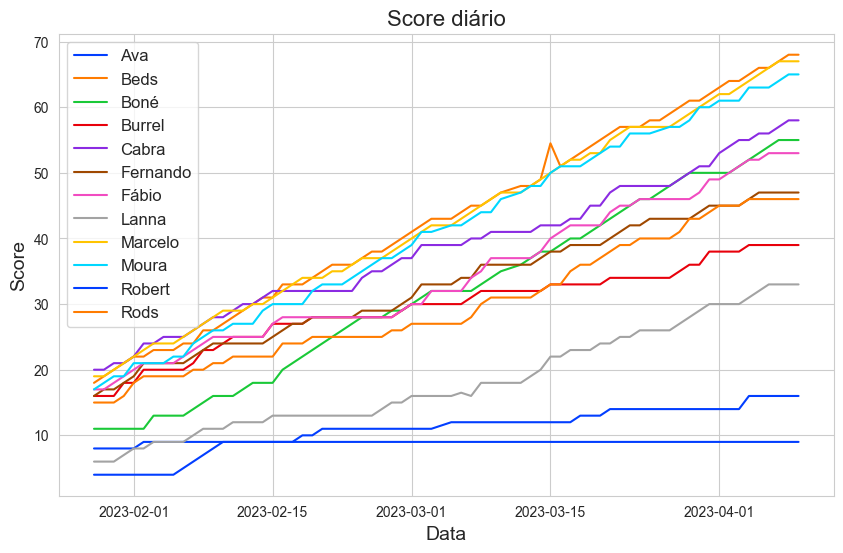

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patheffects import Stroke, Normal

# Crie uma lista com todos os nomes, exceto a coluna "data"
nomes = list(score_geral_scores_daily.columns)
nomes.remove('data')

# Ordene os nomes em ordem alfabética
nomes.sort()

# Use uma paleta de cores com uma cor diferente para cada coluna
cores = sns.color_palette("bright", n_colors=len(nomes))

# Crie o gráfico de linha com uma linha para cada nome
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for i, nome in enumerate(nomes):
    linha = sns.lineplot(data=score_geral_scores_daily, x="data", y=nome, label=nome, color=cores[i])
    linha.set_path_effects([Stroke(linewidth=3, foreground='black'), Normal()])

# Defina os rótulos dos eixos e o título do gráfico
plt.xlabel('Data', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Score diário', fontsize=16)

# Adicione uma legenda mais legível
plt.legend(fontsize=12)

# Exiba o gráfico
plt.show()
